In [2]:
import pandas as pd
import seaborn as sns




# Charger le fichier CSV
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

# Extraire les variables explicatives X (Age, EstimatedSalary)
X = data[['Age', 'EstimatedSalary']]

# Extraire la variable cible y (Purchased)
y = data['Purchased']

# Afficher un aperçu des données
print("Variables explicatives (X) :")
print(X.head())
print("\nVariable cible (y) :")
print(y.head())


Variables explicatives (X) :
    Age  EstimatedSalary
0  19.0          19000.0
1  35.0          20000.0
2  26.0          43000.0
3  27.0          57000.0
4  19.0          76000.0

Variable cible (y) :
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Diviser les données en Training set et Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer la mise à l'échelle des caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Apprentissage des paramètres de mise à l'échelle sur l'ensemble d'entraînement
X_test = scaler.transform(X_test)       # Transformation des données du test set

# Afficher les résultats
print("X_train après mise à l'échelle :")
print(X_train[:5])
print("\nX_test après mise à l'échelle :")
print(X_test[:5])


X_train après mise à l'échelle :
[[-1.06675246 -0.38634438]
 [ 0.79753468 -1.22993871]
 [ 0.11069205  1.853544  ]
 [ 0.60129393 -0.90995465]
 [ 1.87685881 -1.28811763]]

X_test après mise à l'échelle :
[[ 0.79753468 -1.40447546]
 [ 2.07309956  0.51542886]
 [-0.96863208 -0.76450736]
 [ 0.99377543  0.74814454]
 [-0.87051171 -1.22993871]]


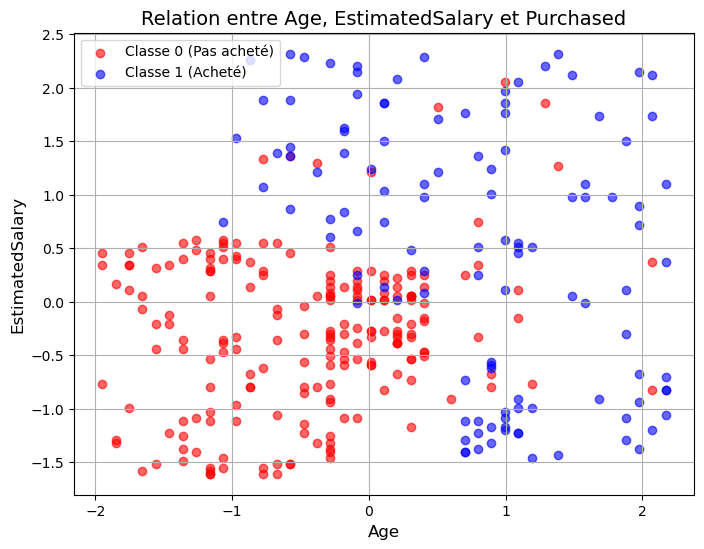

In [4]:
import matplotlib.pyplot as plt

# Revenir aux valeurs originales pour le scatter plot
X_train_original = pd.DataFrame(X_train, columns=['Age', 'EstimatedSalary'])
X_train_original['Purchased'] = y_train.reset_index(drop=True)

# Séparer les classes
class_0 = X_train_original[X_train_original['Purchased'] == 0]
class_1 = X_train_original[X_train_original['Purchased'] == 1]

# Tracer le scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(class_0['Age'], class_0['EstimatedSalary'], color='red', label='Classe 0 (Pas acheté)', alpha=0.6)
plt.scatter(class_1['Age'], class_1['EstimatedSalary'], color='blue', label='Classe 1 (Acheté)', alpha=0.6)
plt.title('Relation entre Age, EstimatedSalary et Purchased', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('EstimatedSalary', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from sklearn.svm import SVC

# Créer un modèle SVM linéaire
svm_model = SVC(kernel='linear', random_state=42)

# Entraîner le modèle sur les données d'entraînement
svm_model.fit(X_train, y_train)

# Afficher un message pour confirmer l'entraînement
print("Le modèle SVM linéaire a été entraîné avec succès.")

Le modèle SVM linéaire a été entraîné avec succès.


In [6]:
# Faire des prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Afficher les classes prédites et réelles
print("Classes prédites :", y_pred)
print("Classes réelles :", y_test.values)


Classes prédites : [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]
Classes réelles : [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1]


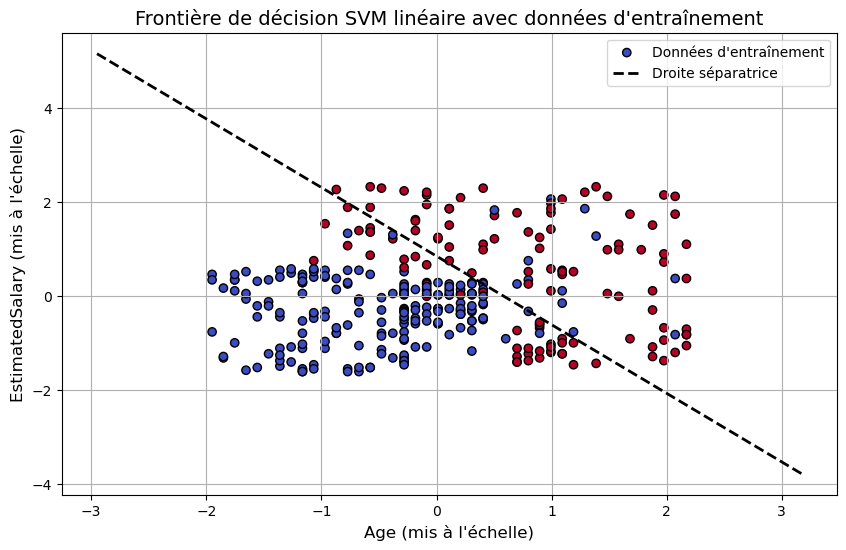

In [ ]:
import numpy as np

w = svm_model.coef_[0]  # Coefficients (w1, w2)
b = svm_model.intercept_[0]  # Biais (b)

# Calculer la droite séparatrice
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x_values = np.linspace(x_min, x_max, 100)
y_values = -(w[0] * x_values + b) / w[1]

# Tracer les points de données
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', label="Données d'entraînement")

# Tracer la droite séparatrice
plt.plot(x_values, y_values, color='black', linestyle='--', linewidth=2, label='Droite séparatrice')

# Ajouter des labels et une légende
plt.title("Frontière de décision SVM linéaire avec données d'entraînement", fontsize=14)
plt.xlabel("Age (mis à l'échelle)", fontsize=12)
plt.ylabel("EstimatedSalary (mis à l'échelle)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()